In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
wood_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [4]:
steel_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [12]:
def plot_coaster_ranking(name_coaster, name_park, df):
    coaster_rankings = df[(df['Name'] == name_coaster) & (df['Park'] == name_park)]
    fig, ax = plt.subplots()
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'])
    ax.set_yticks(coaster_rankings['Rank'].values)
    ax.set_xticks(coaster_rankings['Year of Rank'].values)
    ax.invert_yaxis()
    plt.title('{} Rankings'.format(name_coaster))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()    

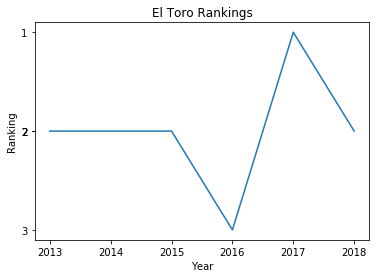

In [13]:
plot_coaster_ranking('El Toro', 'Six Flags Great Adventure', wood_rankings)

In [15]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [18]:
def plot_2_coaster_rankings(coaster1, coaster2, park1, park2, df):
    coaster_1_rankings = df[(df['Name'] == coaster1) & (df['Park'] == park1)]
    coaster_2_rankings = df[(df['Name'] == coaster2) & (df['Park'] == park2)]
    fig, ax = plt.subplots()
    ax.plot(coaster_1_rankings['Year of Rank'],coaster_1_rankings['Rank'], color = 'green', label = coaster1)
    ax.plot(coaster_2_rankings['Year of Rank'],coaster_2_rankings['Rank'], color = 'red', label = coaster2)
    ax.invert_yaxis()
    plt.title("{} vs {} Rankings".format(coaster1, coaster2))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend()
    plt.show()    

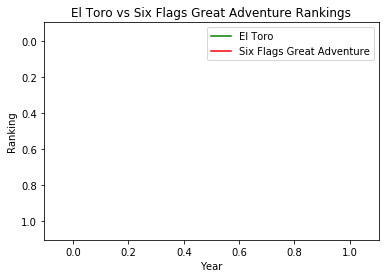

In [19]:
plot_2_coaster_rankings('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood_rankings)

In [20]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [21]:
def plot_top_n(df,n):
  top_n_rankings = df[df['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(10,10))
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title("Top 10 Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

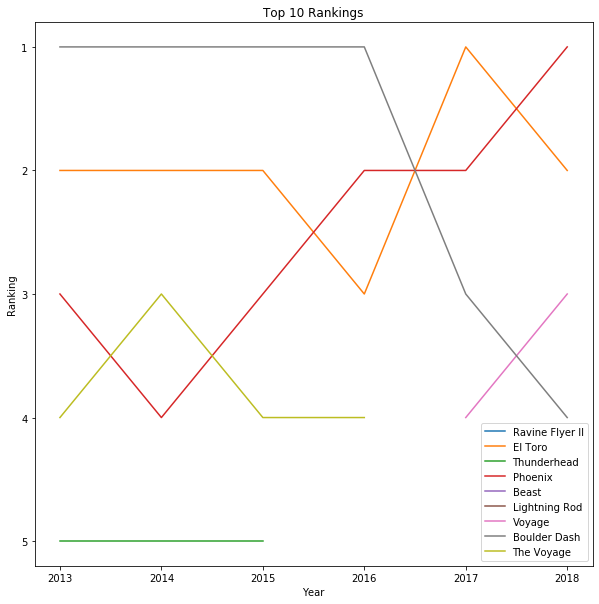

In [22]:
plot_top_n(wood_rankings,5)

In [23]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [24]:
roller_coaster = pd.read_csv('roller_coasters.csv')

In [25]:
roller_coaster.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [35]:
def histogram(column, df=roller_coaster):
    plt.hist(df[column].dropna())
    plt.title("Histogram of Roller Coaster's {}".format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

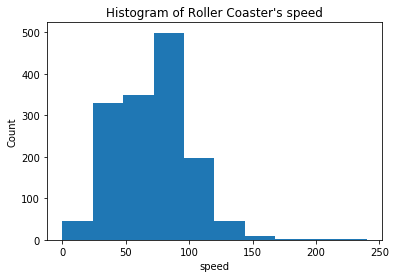

In [36]:
histogram('speed')

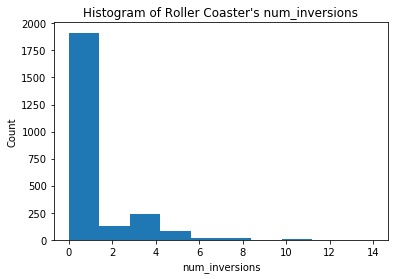

In [38]:
plt.clf()
histogram('num_inversions')

In [42]:
def height_hist(df=roller_coaster):
    heights = df[df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()

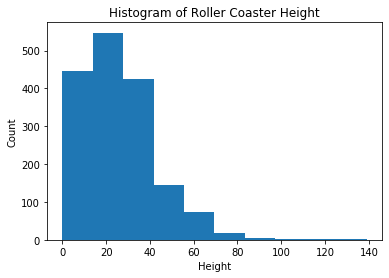

In [43]:
height_hist()

In [44]:
def inversions_by_coaster(park, df=roller_coaster):
    park_coasters = df[df['park'] == park]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    plt.bar(range(len(number_inversions)),number_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names,rotation=90)
    plt.title('Number of Inversions Per Coaster at {}'.format(park))
    plt.xlabel('Roller Coaster')
    plt.ylabel('# of Inversions')
    plt.show()

C:\Users\Jati\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


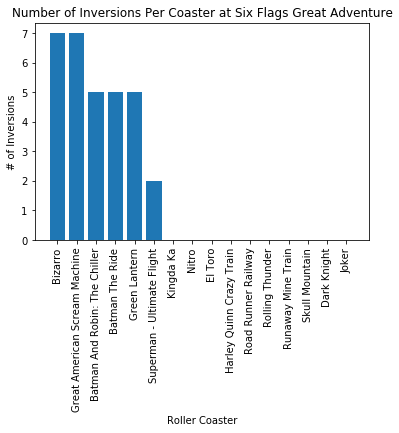

In [46]:
plt.clf()
inversions_by_coaster('Six Flags Great Adventure')

In [57]:
def pie(df=roller_coaster):
    operating_coaster = df[df['status']=='status.operating']
    closed_coaster = df[df['status']=='status.closed.definitely']
    num_operating = len(operating_coaster)
    num_closed = len(closed_coaster)
    status_count = [num_operating,num_closed]
    plt.pie(status_count, autopct='%0.1f%%', labels=['Operating','Closed'])
    plt.axis('equal')
    plt.show()

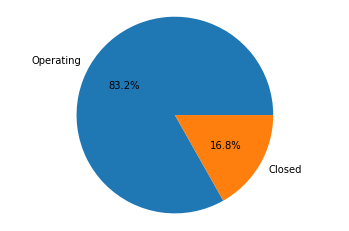

In [58]:
plt.clf()
pie()

In [59]:
def scatter(x,y,df=roller_coaster):
    plt.scatter(df[x],df[y])
    plt.title('Scatter Plot of {} vs. {}'.format(y,x))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

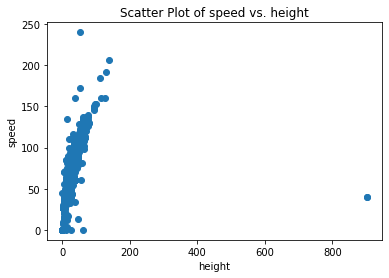

In [60]:
scatter('height','speed')